In [3]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [8]:
import numpy as np
import seaborn as sns
import pandas as pd

In [9]:
df = pd.read_csv('./DATA/fake_reg.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


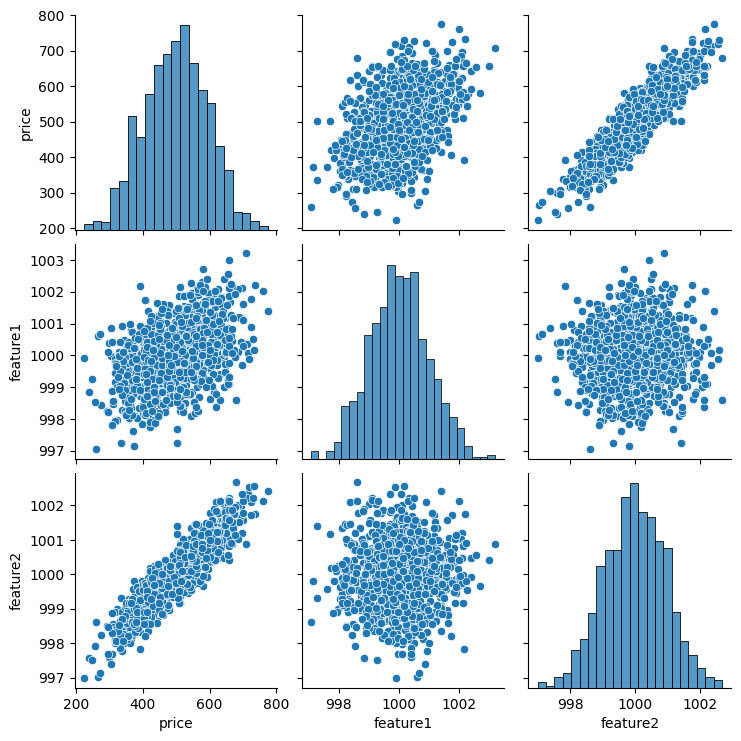

In [11]:
sns.pairplot(df)

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X = df[['feature1', 'feature2']].values

In [15]:
y =df['price'].values

In [16]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
X_train.shape

(700, 2)

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
scaler.fit(X_train)

MinMaxScaler()

In [53]:
X_train = scaler.fit_transform(X_train)

In [54]:
X_test = scaler.fit_transform(X_test)

In [55]:
X_train.min()

0.0

<Axes: >

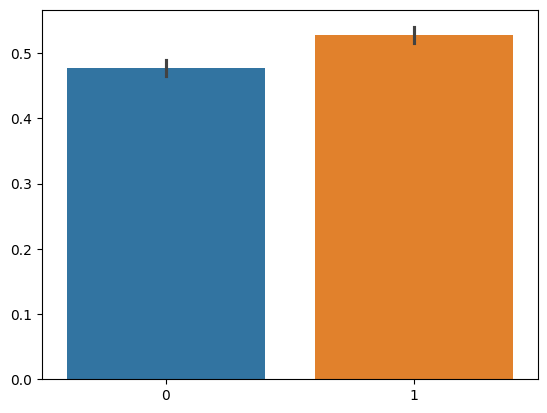

In [56]:
sns.barplot(X_train,)

In [57]:
X_train

array([[0.22179862, 0.55212838],
       [0.34106018, 0.45061693],
       [0.44187649, 0.6432228 ],
       ...,
       [0.4679684 , 0.12119512],
       [0.51313398, 0.51308096],
       [0.51079305, 0.26371433]])

In [58]:
from tensorflow.keras.models import Sequential

In [59]:
from tensorflow.keras.layers import Dense

In [70]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [71]:
model.compile(optimizer='rmsprop', loss='mse' )
#batch_size =200
max_epochs =100

In [72]:
model.fit(x=X_train, y=y_train, epochs=250, verbose=2)

Epoch 1/250
22/22 - 1s - loss: 259075.0781 - 799ms/epoch - 36ms/step
Epoch 2/250
22/22 - 0s - loss: 258998.8750 - 29ms/epoch - 1ms/step
Epoch 3/250
22/22 - 0s - loss: 258927.5938 - 32ms/epoch - 1ms/step
Epoch 4/250
22/22 - 0s - loss: 258850.6719 - 39ms/epoch - 2ms/step
Epoch 5/250
22/22 - 0s - loss: 258765.0781 - 33ms/epoch - 2ms/step
Epoch 6/250
22/22 - 0s - loss: 258673.3281 - 33ms/epoch - 2ms/step
Epoch 7/250
22/22 - 0s - loss: 258573.9219 - 32ms/epoch - 1ms/step
Epoch 8/250
22/22 - 0s - loss: 258464.4375 - 30ms/epoch - 1ms/step
Epoch 9/250
22/22 - 0s - loss: 258342.4688 - 32ms/epoch - 1ms/step
Epoch 10/250
22/22 - 0s - loss: 258206.1562 - 33ms/epoch - 1ms/step
Epoch 11/250
22/22 - 0s - loss: 258050.8281 - 33ms/epoch - 1ms/step
Epoch 12/250
22/22 - 0s - loss: 257871.6406 - 34ms/epoch - 2ms/step
Epoch 13/250
22/22 - 0s - loss: 257662.5781 - 30ms/epoch - 1ms/step
Epoch 14/250
22/22 - 0s - loss: 257422.4219 - 32ms/epoch - 1ms/step
Epoch 15/250
22/22 - 0s - loss: 257144.2500 - 30ms/epoc

In [73]:
model.history.history

{'loss': [259075.078125,
  258998.875,
  258927.59375,
  258850.671875,
  258765.078125,
  258673.328125,
  258573.921875,
  258464.4375,
  258342.46875,
  258206.15625,
  258050.828125,
  257871.640625,
  257662.578125,
  257422.421875,
  257144.25,
  256826.21875,
  256468.984375,
  256070.53125,
  255624.109375,
  255129.390625,
  254584.28125,
  253984.75,
  253329.734375,
  252610.71875,
  251826.328125,
  250977.578125,
  250059.515625,
  249065.875,
  247994.875,
  246844.1875,
  245603.5625,
  244279.65625,
  242865.171875,
  241350.125,
  239736.015625,
  238025.046875,
  236207.203125,
  234286.359375,
  232243.25,
  230097.140625,
  227829.625,
  225435.453125,
  222927.75,
  220298.515625,
  217527.765625,
  214636.34375,
  211594.875,
  208433.71875,
  205137.484375,
  201705.8125,
  198106.125,
  194369.484375,
  190487.5,
  186455.640625,
  182235.328125,
  177857.390625,
  173315.34375,
  168625.3125,
  163739.296875,
  158673.484375,
  153456.703125,
  148098.328125,
 

In [74]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

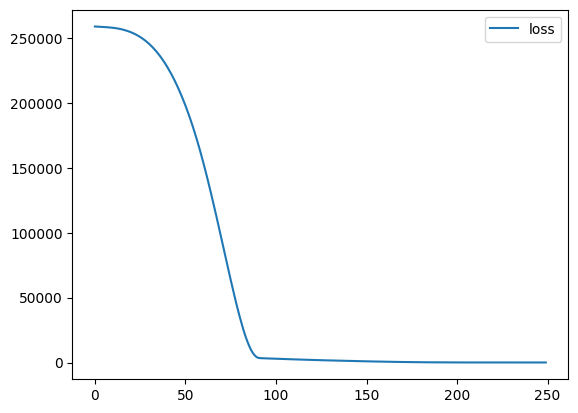

In [75]:
loss_df.plot()

In [76]:
model.evaluate(X_test, y_test, verbose=0)

514.4581298828125

In [77]:
test_predictions=model.predict(X_test)

10/10 [==============================] - 0s 4ms/step


In [79]:
predic_actual = pd.DataFrame(test_predictions,columns=['predic'])

In [85]:
y_test = pd.DataFrame(y_test, columns=['Actual'])

In [88]:
predic_actual =pd.concat([predic_actual, y_test], axis =1)

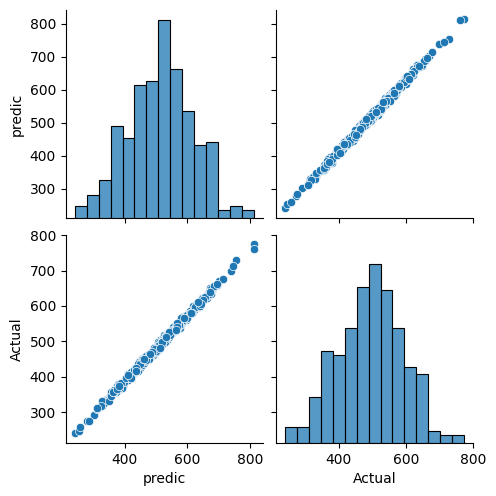

In [95]:
sns.pairplot(predic_actual)

<Axes: xlabel='Actual', ylabel='predic'>

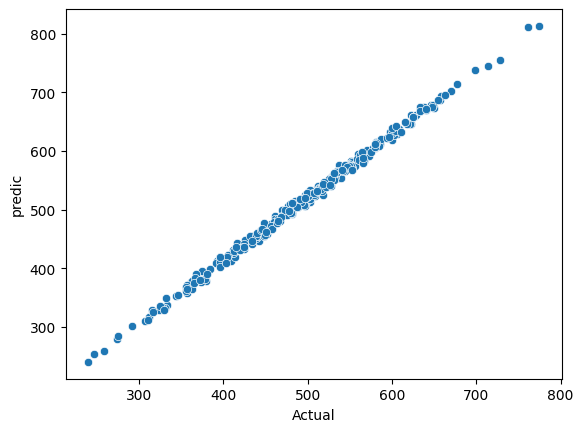

In [96]:
sns.scatterplot(data=predic_actual, x = 'Actual', y='pred

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [98]:
mean_absolute_error(predic_actual['Actual'],predic_actual['predic'])

20.725804244023845

In [99]:
mean_squared_error(predic_actual['Actual'],predic_actual['predic'])

514.4580598984379

In [100]:
np.sqrt(514)

22.67156809750927

In [101]:
from tensorflow.keras.models import load_model

In [102]:
model.save('my_gem_model')

INFO:tensorflow:Assets written to: my_gem_model\assets


In [103]:
later_model = load_model('my_gem_model')

In [104]:
%matplotlib inline

In [105]:
import matplotlib.pyplot as plt

In [106]:
x =np.linspace(0,50,501)

In [107]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [108]:
y=np.sin(x)

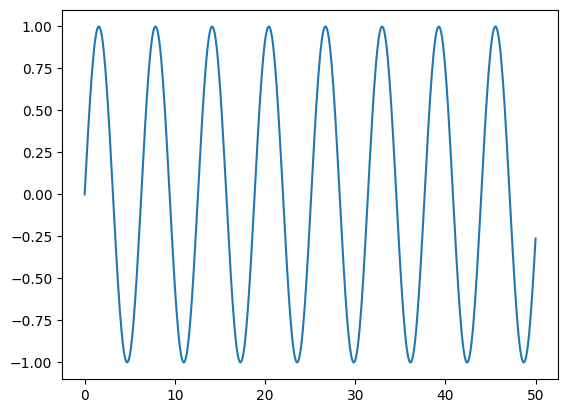

In [109]:
plt.plot(x,y)

In [110]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [111]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [112]:
test_percent = 0.1

In [113]:
test_point =np.round(len(df)*test_percent)

In [114]:
test_point

50.0

In [115]:
test_ind = int(len(df)-test_point)

In [116]:
train = df.iloc[:test_ind]

In [117]:
test = df.iloc[test_ind:]

In [118]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [119]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
scaler = MinMaxScaler()

In [123]:
scaler.fit(train)

MinMaxScaler()

In [124]:
scaled_train = scaler.fit_transform(train)

In [125]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [126]:
scaled_test = scaler.fit_transform(test)

In [127]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [147]:
length = 50
batch_size =1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size =batch_size)

In [148]:
len(generator)

401

In [149]:
X, y = generator[0]

In [150]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [142]:
y

array([[0.92073798]])

In [151]:
from tensorflow.keras.models import Sequential

In [152]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [153]:
n_features =1

In [154]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [155]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [156]:
model.fit_generator(generator, epochs=5)

Epoch 1/5


C:\Users\Jae-EunPark\AppData\Local\Temp\ipykernel_45584\3367823435.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=5)


401/401 [==============================] - 4s 8ms/step - loss: 0.0053
Epoch 2/5
401/401 [==============================] - 3s 7ms/step - loss: 8.3327e-05
Epoch 3/5
401/401 [==============================] - 3s 7ms/step - loss: 0.0011
Epoch 4/5
401/401 [==============================] - 3s 7ms/step - loss: 1.1788e-05
Epoch 5/5
401/401 [==============================] - 3s 7ms/step - loss: 1.0219e-05


In [157]:
losses = pd.DataFrame(model.history.history)

<Axes: >

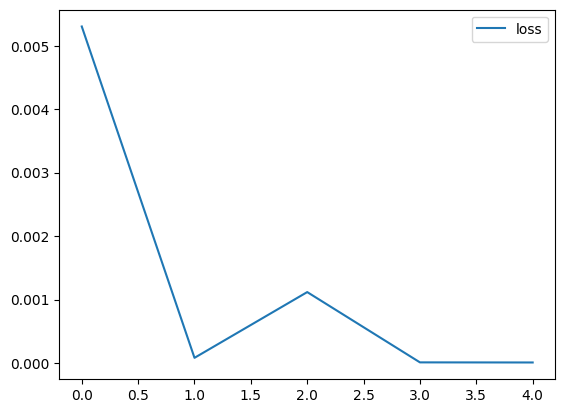

In [158]:
losses.plot()

In [159]:
first_eval_batch = scaled_train[-length:]

In [161]:
first_eval_batch = first_eval_batch.reshape((1,length, n_features))

In [163]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 189ms/step


array([[0.9467648]], dtype=float32)

In [165]:
scaled_test[-1]

array([0.36901106])

In [170]:
test_predictions =[]
first_eval_batch = scaled_train[-length:]
current_batch =first_eval_batch.reshape((1,length, n_features))

for i in range(len(test)):

    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 25ms/step


In [171]:
test_predictions

[array([0.9467648], dtype=float32),
 array([0.96545315], dtype=float32),
 array([0.9799799], dtype=float32),
 array([0.9898807], dtype=float32),
 array([0.99383885], dtype=float32),
 array([0.9938387], dtype=float32),
 array([0.9890498], dtype=float32),
 array([0.97993034], dtype=float32),
 array([0.96471584], dtype=float32),
 array([0.9456437], dtype=float32),
 array([0.9217251], dtype=float32),
 array([0.8941303], dtype=float32),
 array([0.86187804], dtype=float32),
 array([0.82593954], dtype=float32),
 array([0.7864552], dtype=float32),
 array([0.74506396], dtype=float32),
 array([0.70083255], dtype=float32),
 array([0.6551442], dtype=float32),
 array([0.6069555], dtype=float32),
 array([0.5589515], dtype=float32),
 array([0.509443], dtype=float32),
 array([0.45967013], dtype=float32),
 array([0.40921298], dtype=float32),
 array([0.36098108], dtype=float32),
 array([0.3136438], dtype=float32),
 array([0.26832432], dtype=float32),
 array([0.22387269], dtype=float32),
 array([0.184508

In [173]:
true_predictions = scaler.inverse_transform(test_predictions)

In [174]:
true_predictions

array([[ 0.89248905],
       [ 0.92984487],
       [ 0.95888214],
       [ 0.97867273],
       [ 0.98658465],
       [ 0.98658441],
       [ 0.97701187],
       [ 0.95878313],
       [ 0.92837108],
       [ 0.89024809],
       [ 0.84243748],
       [ 0.78727861],
       [ 0.72281004],
       [ 0.65097307],
       [ 0.57204841],
       [ 0.48931202],
       [ 0.40089846],
       [ 0.3095727 ],
       [ 0.21324901],
       [ 0.11729443],
       [ 0.01833256],
       [-0.08115771],
       [-0.1820158 ],
       [-0.27842587],
       [-0.37304766],
       [-0.46363617],
       [-0.5524899 ],
       [-0.63117383],
       [-0.70518867],
       [-0.77078457],
       [-0.83120208],
       [-0.87952435],
       [-0.92065138],
       [-0.95002282],
       [-0.97471234],
       [-0.98550034],
       [-0.98964462],
       [-0.97849215],
       [-0.9635044 ],
       [-0.93521361],
       [-0.90046857],
       [-0.84981068],
       [-0.7983649 ],
       [-0.73464365],
       [-0.66833932],
       [-0

In [176]:
test['predic']=true_predictions

C:\Users\Jae-EunPark\AppData\Local\Temp\ipykernel_45584\897637783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predic']=true_predictions


In [177]:
test

,Sine,predic
45.1,0.899097,0.892489
45.2,0.938307,0.929845
45.3,0.968142,0.958882
45.4,0.988304,0.978673
45.5,0.998591,0.986585
45.6,0.998900,0.986584
45.7,0.989229,0.977012
45.8,0.969673,0.958783
45.9,0.940429,0.928371
46.0,0.901788,0.890248


<Axes: >

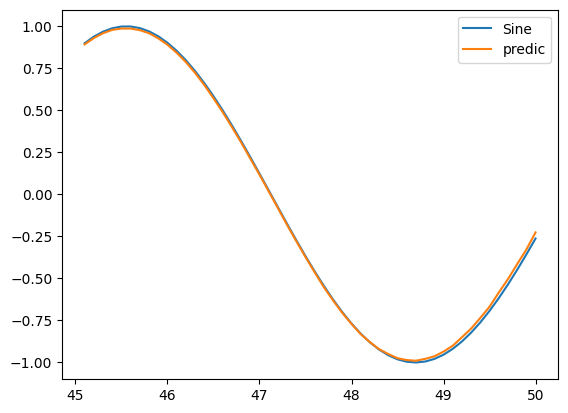

In [178]:
test.plot()

In [179]:
from tensorflow.keras.callbacks import EarlyStopping

In [180]:
early_stop =EarlyStopping(monitor='val_loss', patience=2)

In [184]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size )

In [185]:
model = Sequential()

model.add(LSTM(50, input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [188]:
model.fit(generator,epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 4s 11ms/step - loss: 1.5711e-04 - val_loss: 2.1770e-05
Epoch 2/20
402/402 [==============================] - 4s 11ms/step - loss: 5.7983e-05 - val_loss: 1.6265e-04
Epoch 3/20
402/402 [==============================] - 4s 11ms/step - loss: 1.5959e-04 - val_loss: 3.2393e-05


In [189]:
test_predictions =[]
first_eval_batch = scaled_train[-length:]
current_batch =first_eval_batch.reshape((1,length, n_features))

for i in range(len(test)):

    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 19ms/step


In [190]:
true_predictions = scaler.inverse_transform(test_predictions)

In [191]:
test['predic_LSTM']=true_predictions

C:\Users\Jae-EunPark\AppData\Local\Temp\ipykernel_45584\992173333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predic_LSTM']=true_predictions


In [192]:
test

,Sine,predic,predic_LSTM
45.1,0.899097,0.892489,0.904946
45.2,0.938307,0.929845,0.944918
45.3,0.968142,0.958882,0.975750
45.4,0.988304,0.978673,0.997166
45.5,0.998591,0.986585,1.009062
45.6,0.998900,0.986584,1.011463
45.7,0.989229,0.977012,1.004501
45.8,0.969673,0.958783,0.988403
45.9,0.940429,0.928371,0.963468
46.0,0.901788,0.890248,0.930059


<Axes: >

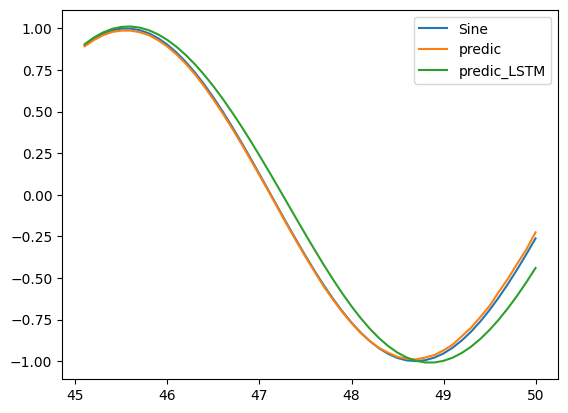

In [193]:
test.plot()